In [45]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in CSV file
db = pd.read_csv('MLB2026.csv')
print(db.info())

# remove NULL values
FA2026 = db.dropna().copy()

# print data info
print(FA2026.info())

# print top five rows of data frame
display(FA2026.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              98 non-null     object 
 1   Position            98 non-null     object 
 2   Acquirer            98 non-null     object 
 3   Years               98 non-null     int64  
 4   Contract Value (m)  98 non-null     float64
 5   Age                 98 non-null     int64  
 6   WAR                 88 non-null     float64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 97
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              88 non-null     object 
 1   Position            88 non-null     object 
 2   Acquirer            88 non-null     object 
 3   Years               88 non-null     int64  

,Player,Position,Acquirer,Years,Contract Value (m),Age,WAR
0,J.T. Realmuto,C,PHI,3,45.00,35,4.0
1,Victor Caratini,C,MIN,2,14.00,32,2.7
2,Danny Jansen,C,TEX,2,14.50,31,1.8
3,James McCann,C,AZ,1,2.75,36,0.9
4,Yohel Pozo,C,STL,1,0.85,29,0.2


# Overall data

As of 7:30pm AEST on 18/1/2026, there have been 98 free agent deals done, of which, 88 of these players had a wins above replacement calculation for the 2025 season whilst others did not due to reasons such as coming through the international free agent system -- e.g. they played in Japan last season.

We will ignore those that have no 2025 WAR calculation in this analysis.

In [46]:
# Calculate Average annual value of contracts
FA2026['AAV'] = FA2026['Contract Value (m)'] / FA2026['Years']


# Divide AAV by WAR for contract value per WAR
FA2026['AAV/WAR'] = FA2026['AAV'] / FA2026['WAR']

display(FA2026.head(5))

,Player,Position,Acquirer,Years,Contract Value (m),Age,WAR,AAV,AAV/WAR
0,J.T. Realmuto,C,PHI,3,45.00,35,4.0,15.00,3.750000
1,Victor Caratini,C,MIN,2,14.00,32,2.7,7.00,2.592593
2,Danny Jansen,C,TEX,2,14.50,31,1.8,7.25,4.027778
3,James McCann,C,AZ,1,2.75,36,0.9,2.75,3.055556
4,Yohel Pozo,C,STL,1,0.85,29,0.2,0.85,4.250000


In [47]:
# Run regression for AAV/WAR combination

#Set variables
AAVregressX = FA2026['WAR'].to_numpy()
AAVregressY = FA2026['AAV'].to_numpy()

# Run linear regression (degree=1 for straight line)
slope, intercept = np.polyfit(AAVregressX, AAVregressY, 1)

# Create predicted y values for the regression line
AAV_y_pred = slope * AAVregressX + intercept

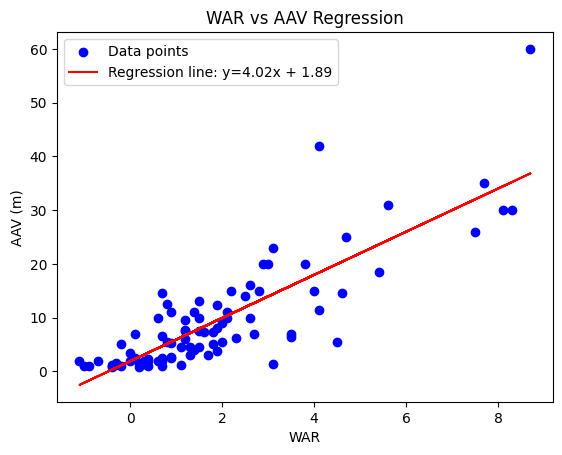

In [48]:
# Plot scatter and regression line

plt.scatter(AAVregressX, AAVregressY, color='blue', label='Data points')
plt.plot(AAVregressX, AAV_y_pred, color='red', label=f'Regression line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('WAR')
plt.ylabel('AAV (m)')
plt.title('WAR vs AAV Regression')
plt.legend()
plt.show()

Based on the above regression, each point of WAR adds approximatley $4 million in annual average contract value. 

# What About Cody Bellinger

Cody Bellinger, who finished 2025 with the New York Yankees, is arguably one of the biggest free agent players who is still unsigned. How can this data help us predict what his final contract might look like.

For the 2025 season, Bellingers total Wins Above Replacement totalled 5.1.

In [49]:
# Predict AAV for a new WAR value
new_war = 7.0
predicted_aav = slope * new_war + intercept
print(f"Estimated AAV for WAR={new_war}: ${predicted_aav:.2f}m")

Estimated AAV for WAR=7.0: $30.00m


Based on the above regression, and the WAR figures supplied by MLB.com -- which is the aggregate of a players 2024 and 2025 WAR total -- the implied AAV for Cody Bellinger is around $30m per year. This is higher than the $27m option Bellinger refused to enter free agency.

But let's dig into the numbers further and exclude players whose contracts are not correlated to Bellinger due to position (nameley catchers and pitchers)

In [51]:
# Create mask where pitchers and catchers are exluded

mask = ~FA2026['Position'].isin(['C', 'SP', 'RP'])
filtered_df = FA2026[mask]


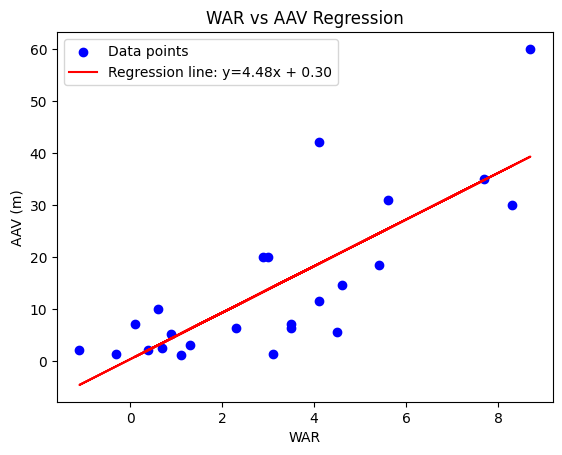

In [52]:
# Run new regression

#Set variables
Filter_regressX = filtered_df['WAR'].to_numpy()
Filter_regressY = filtered_df['AAV'].to_numpy()

# Run linear regression (degree=1 for straight line)
slope, intercept = np.polyfit(Filter_regressX, Filter_regressY, 1)

# Create predicted y values for the regression line
Filter_y_pred = slope * Filter_regressX + intercept

# Plot scatter and regression line

plt.scatter(Filter_regressX, Filter_regressY, color='blue', label='Data points')
plt.plot(Filter_regressX, Filter_y_pred, color='red', label=f'Regression line: y={slope:.2f}x + {intercept:.2f}')
plt.xlabel('WAR')
plt.ylabel('AAV (m)')
plt.title('WAR vs AAV Regression')
plt.legend()
plt.show()

In [53]:
# Predict AAV for a new WAR value
new_war = 7.0
predicted_aav = slope * new_war + intercept
print(f"Estimated AAV for WAR={new_war}: ${predicted_aav:.2f}m")

Estimated AAV for WAR=7.0: $31.67m


When we remove pitchers and catchers whose skills are valued differently to a batter and position player like Bellinger, his implied AAV increases to $31.67m. This is just under the $32m per year the Yankess have rumoured to have offered him.

So, now that we have an AAV total, how many years should he be offered?

For reference, in 2026, Bellinger will be 30 years old.

In [ ]:
# Filter players with age = 30
similar_age_players = filtered_df[filtered_df['Age'] == 30]

# Sort by years descending
similar_age_players_sorted = similar_age_players.sort_values(by='Years', ascending=False)

# Display data
print(similar_age_players_sorted[['Player', 'Age', 'Years', 'WAR']])

          Player  Age  Years  WAR
14  Amed Rosario   30      1  0.7
17  Ha-Seong Kim   30      1  2.9
31   Lane Thomas   30      1  0.9


This is not helpful as the only other 30 year olds in the data frame were offered 1 year contracts and had WAR totals significantly lower. Let's expland the range by 1 year either side.

In [ ]:
# Filter players with age between 29 and 31
similar_age_players = filtered_df[(filtered_df['Age'] >= 29) & (filtered_df['Age'] <= 31)]

# Sort by years descending
similar_age_players_sorted = similar_age_players.sort_values(by='Years', ascending=False)

# Display data
print(similar_age_players_sorted[['Player', 'Age', 'Years', 'WAR', 'AAV', 'AAV/WAR']])

            Player  Age  Years  WAR    AAV   AAV/WAR
6      Pete Alonso   31      5  5.6  31.00  5.535714
7      Josh Naylor   29      5  5.4  18.50  3.425926
28     Kyle Tucker   29      4  8.7  60.00  6.896552
12    Willi Castro   29      2  3.5   6.40  1.828571
14    Amed Rosario   30      1  0.7   2.50  3.571429
17    Ha-Seong Kim   30      1  2.9  20.00  6.896552
25  Cedric Mullins   31      1  3.5   7.00  2.000000
30     Jake Fraley   31      1  1.3   3.00  2.307692
31     Lane Thomas   30      1  0.9   5.25  5.833333


Expanding the range to 'similar' age players is more helpful. It includes 3 players whose WAR totals were above 5.0, each of whom received 4 or 5 year contracts.

The highest on the list regarding WAR is Kyle Tucker, who like Bellinger is an outfielder, who received a 4 year contract but whose AAV/WAR total is significantly higher than the other two 'star' players. Those whose AAV/WAR total is similar to what our regression implies is the market average were given 5 years.

In [ ]:
# Searching for position players with contracts above 5 years 

#  filter for players with years above 5
similar_years_players = filtered_df[(filtered_df['Years'] >5)]

# Sort by years descending
similar_years_players_sorted = similar_years_players.sort_values(by='Years', ascending=False)

# Display data
print(similar_years_players_sorted[['Player', 'Age', 'Years', 'WAR', 'AAV', 'AAV/WAR']])

Empty DataFrame
Columns: [Player, Age, Years, WAR, AAV, AAV/WAR]
Index: []


Given that no other player, outside of pitchers, have received a contract length greater than 5 years, it is difficult to argue that Bellinger should get more than 5 years. However, given his AAV/WAR is closer to the market average than two players above who received 5 year contracts, it could be argued that 6 years might be acceptable in the current market.

# My offer:

## 5 years/ $32m AAV = $160m.
### If I am desperate, either 6 years/ $30m (total $180m) or 5 years/$32m with a further 1 year option.